#

# 13. Unsupervised Learning

## CPE 490 590
## Rahul Bhadani

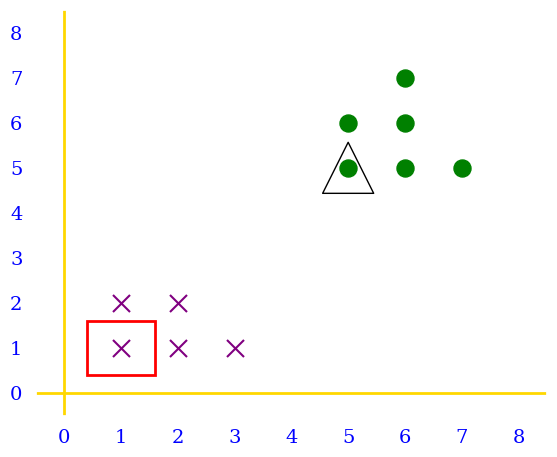

In [12]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 21

# Data for the two clusters
cluster1 = [(1, 1), (2, 1), (1, 2), (2, 2), (3, 1)]
cluster2 = [(5, 5), (5, 6), (6, 5), (6, 6), (7, 5), (6, 7)]

# Extract x and y coordinates for each cluster
x1, y1 = zip(*cluster1)
x2, y2 = zip(*cluster2)

# Create the plot
plt.figure(figsize=(6, 5))

# Plot clusters with different markers and colors
plt.scatter(x1, y1, marker='x', color='purple', s=150, label='Cluster 1')
plt.scatter(x2, y2, marker='o', color='green', s=150, label='Cluster 2')

plt.scatter([5], [5], marker='^', color='none', s=1350, edgecolor='black')
plt.gca().add_patch(plt.Rectangle((0.4, 0.4), 1.2, 1.2, fill=False, edgecolor='red', linewidth=2))


# Set up the axes
plt.axhline(y=0, color='gold', linestyle='-', linewidth=2)
plt.axvline(x=0, color='gold', linestyle='-', linewidth=2)

# Add tick marks
plt.xticks(range(9), color='blue')
plt.yticks(range(9), color='blue')

# Add labels and title
plt.grid(False)
plt.xlim(-0.5, 8.5)
plt.ylim(-0.5, 8.5)


plt.tight_layout()
plt.savefig('../figures/two_clusters.pdf', format='pdf')

plt.show()

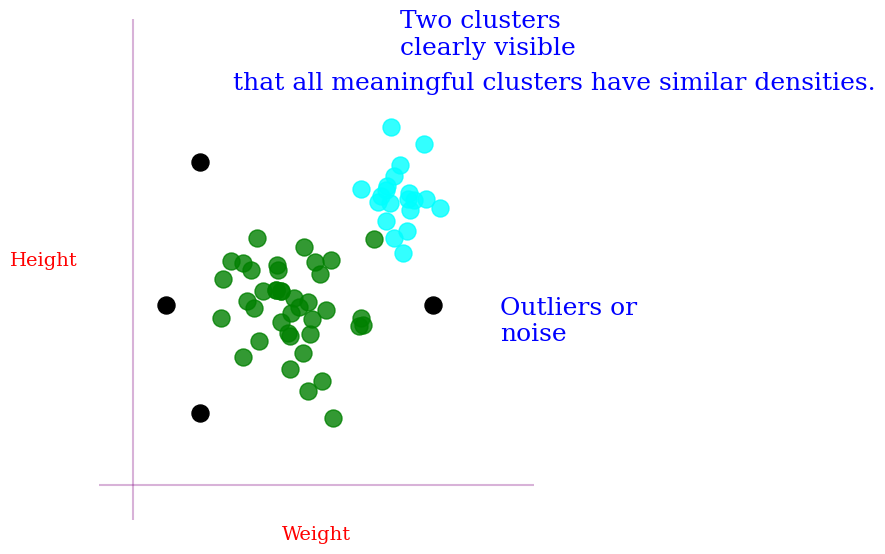

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch

# Set random seed for reproducibility
np.random.seed(42)

# Create figure and axis
plt.figure(figsize=(8, 6))
ax = plt.gca()

# Generate data for two clusters
# Cluster 1 (green)
cluster1_x = np.random.normal(5, 1.2, 40)
cluster1_y = np.random.normal(5, 1.2, 40)

# Cluster 2 (cyan)
cluster2_x = np.random.normal(8, 0.8, 20)
cluster2_y = np.random.normal(8, 0.8, 20)

# Generate outliers (black)
outliers_x = np.array([1, 2,  2, 9])
outliers_y = np.array([5, 9,  2, 5])

# Plot clusters and outliers
plt.scatter(cluster1_x, cluster1_y, color='green', s=150, alpha=0.8)
plt.scatter(cluster2_x, cluster2_y, color='cyan', s=150, alpha=0.8)
plt.scatter(outliers_x, outliers_y, color='black', s=150)

# Add axes labels in red
plt.xlabel('Weight', color='red', fontsize=14)
plt.ylabel('Height', color='red', fontsize=14, rotation=0, labelpad=40)

# Remove tick marks
plt.xticks([])
plt.yticks([])



# Add arrow annotations
arrow_props = dict(arrowstyle='->', color='blue', lw=2)

# Arrow to "Two clusters clearly visible"
plt.annotate('Two clusters\nclearly visible', 
            xy=(7, 8), 
            xytext=(8, 12),
            fontsize=18, 
            color='blue')

# Arrow to "Outliers or noise"
plt.annotate('Outliers or\nnoise', 
            xy=(9, 5), 
            xytext=(11, 4),
            fontsize=18, 
            color='blue')

# Add "densities" note at the top
plt.text(3, 11.0, 'that all meaningful clusters have similar densities.', 
        fontsize=18, color='blue')

# Add axis lines
plt.axhline(y=0, color='purple', linestyle='-', alpha=0.3)
plt.axvline(x=0, color='purple', linestyle='-', alpha=0.3)

# Set plot limits
plt.xlim(-1, 12)
plt.ylim(-1, 13)

# Remove box around the plot
for spine in ax.spines.values():
    spine.set_visible(False)


# Show the plot
plt.tight_layout()
plt.savefig('../figures/two_clusters_with_outliers.pdf', format='pdf')
plt.show()

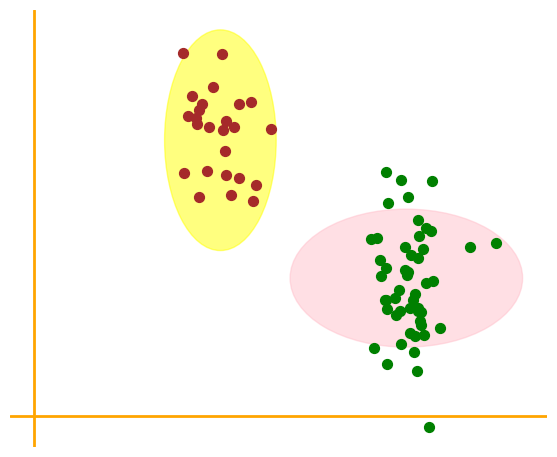

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse, Circle  # Import patches explicitly

# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 5))

# Draw the axes (orange lines)
ax.axhline(y=0, color='orange', linewidth=2)
ax.axvline(x=0, color='orange', linewidth=2)

# Generate random points for the yellow circular cluster with brown dots
yellow_x = np.random.normal(loc=4, scale=0.5, size=25)
yellow_y = np.random.normal(loc=3, scale=0.5, size=25)

# Generate random points for the pink elongated elliptical cluster with green dots
pink_x = np.random.normal(loc=8, scale=0.5, size=50)
pink_y = np.random.normal(loc=1.5, scale=0.5, size=50)

# Create the yellow circular background
yellow_circle = Circle((4, 3), 1.2, color='yellow', alpha=0.5)
ax.add_patch(yellow_circle)

# Create the pink elongated elliptical background
angle = 0  # Angle in degrees
pink_ellipse = Ellipse((8, 1.5), 5, 1.5, angle=angle, color='pink', alpha=0.5)
ax.add_patch(pink_ellipse)

# Plot the points
ax.scatter(yellow_x, yellow_y, color='brown', s=50, zorder=3)
ax.scatter(pink_x, pink_y, color='green', s=50, zorder=3)

# Set the axis limits with some padding
# ax.set_xlim(-1, 12)
# ax.set_ylim(-1, 5)

# Remove the default axis lines and ticks for a cleaner look
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

# Show the plot
plt.tight_layout()
plt.savefig('../figures/distribution_based_clustering.pdf', format='pdf')

plt.show()

# 1. K-Means

# Define our data points

In [15]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 24


data = np.array([(1, 1), (2, 1), (1, 2), (2, 2), (3, 1), (5, 5), (6, 5), (5, 6), (6, 6), (7, 5), (6, 7)])

# random data points
# data = np.random.randint(1, 10, size=(41, 2))




# Initialize Centroids

In [16]:
# Initialize centroids
centroids = np.array([(1, 1), (5, 5)])

# Initialize centroids randomly
# centroids = data[np.random.choice(range(data.shape[0]), size=2, replace=False)]


# Iterate over and plot

[0 0 0 0 0 1 1 1 1 1 1]


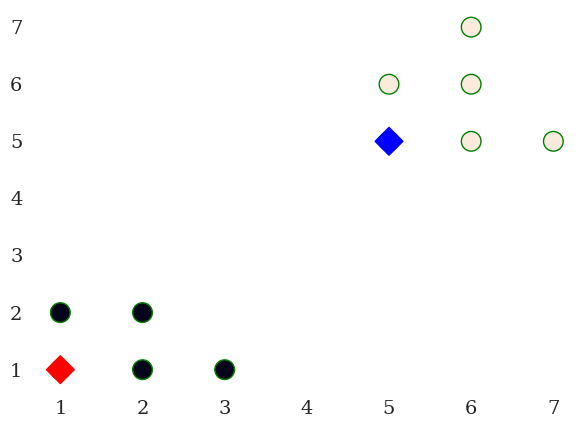

New centroids: [[1.8        1.4       ]
 [5.83333333 5.66666667]]
[0 0 0 0 0 1 1 1 1 1 1]


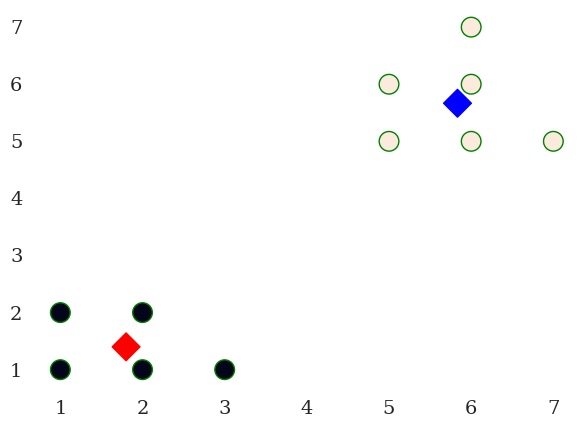

New centroids: [[1.8        1.4       ]
 [5.83333333 5.66666667]]
[0 0 0 0 0 1 1 1 1 1 1]


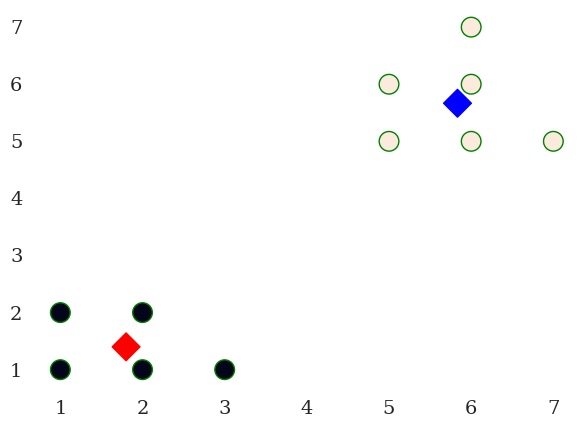

New centroids: [[1.8        1.4       ]
 [5.83333333 5.66666667]]
[0 0 0 0 0 1 1 1 1 1 1]


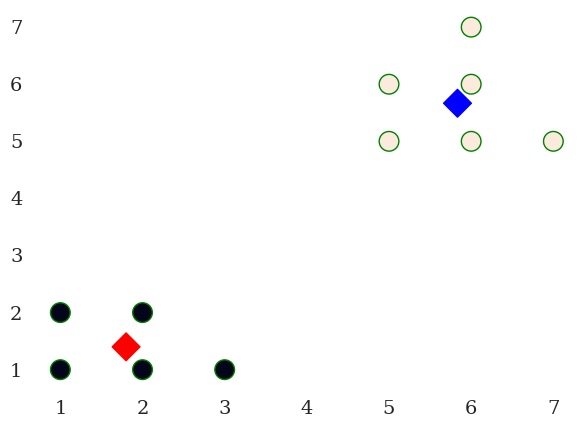

New centroids: [[1.8        1.4       ]
 [5.83333333 5.66666667]]
[0 0 0 0 0 1 1 1 1 1 1]


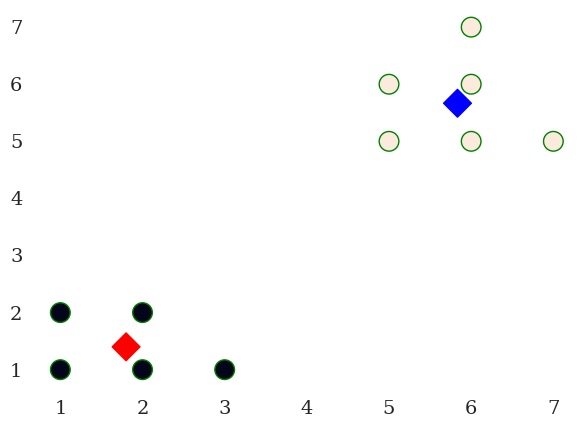

New centroids: [[1.8        1.4       ]
 [5.83333333 5.66666667]]
Final centroids: [[1.8        1.4       ]
 [5.83333333 5.66666667]]


In [17]:

# Define the maximum number of iterations
max_iterations = 5

# Run the K-means algorithm
for _ in range(max_iterations):
    # Assign data points to nearest centroid
    labels = np.argmin(np.linalg.norm(data[:, np.newaxis] - centroids, axis=2), axis=1)
    print(labels)
    
    # Plot data points and centroids
    plt.scatter(data[:, 0], data[:, 1], c=labels,  edgecolors='green', s=200)
    plt.scatter(centroids[:, 0], centroids[:, 1], c=['red', 'blue'], marker='D', s= 200)
    plt.show()
    
    # Recalculate centroids
    centroids = np.array([data[labels == i].mean(axis=0) for i in range(2)])
    print("New centroids:", centroids)

print("Final centroids:", centroids)

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.vq import kmeans, whiten

# Given data
data = np.array([(1, 1), (2, 1), (1, 2), (2, 2), (3, 1), (5, 5), (6, 5), (5, 6), (6, 6), (7, 5), (6, 7)])

# Normalize the data
whitened_data = whiten(data)

# Number of clusters (you can adjust this)
k_clusters = 2

# Perform k-means clustering
centroids, distortion = kmeans(whitened_data, k_clusters)

print(f"Centroids:\n{centroids}")
print(f"Distortion (mean Euclidean distance): {distortion:.4f}")


Centroids:
[[2.73607586 2.55327282]
 [0.84427484 0.63080858]]
Distortion (mean Euclidean distance): 0.4164


/home/refulgent/anaconda3/envs/CPE490590/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


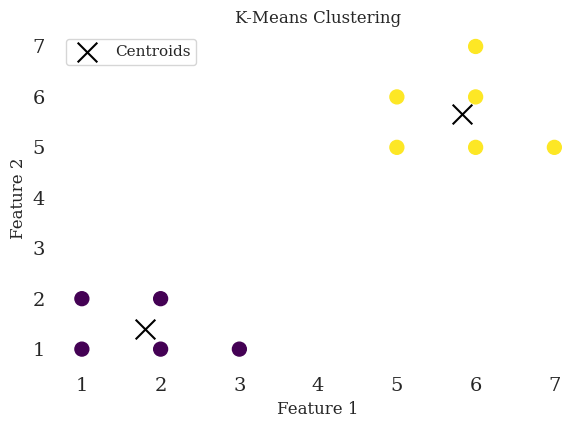

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans                 

# Given data
data = np.array([(1, 1), (2, 1), (1, 2), (2, 2), (3, 1), (5, 5), (6, 5), (5, 6), (6, 6), (7, 5), (6, 7)])

# Number of clusters (you can adjust this)
k_clusters = 2

# Perform k-means clustering
kmeans = KMeans(n_clusters=k_clusters)
labels = kmeans.fit_predict(data)

# Plot the clusters
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='black', marker='x', s=200, label='Centroids')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


# 2. Affinity Propagation Clustering
*Inspired from https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial-in-python/code*

In [20]:
# !pip install squarify

In [1]:
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
import seaborn as sns             ## to visualize random distributions
%matplotlib inline
import squarify                   ## for Treemaps

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

## Load the dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/rahulbhadani/CPE490_590_Sp2025/refs/heads/master/Data/Mall_Customer/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Checking the shape of the dataset, rows, columns, duplicate entries & missing values


In [3]:
print('Number of records (rows) in the dataset are: {}'.format(df.shape[0]))
print('Number of features (columns) in the dataset are: {}'.format(df.shape[1]))
print('Number of duplicate entries in the dataset are: {}'.format(df.duplicated().sum()))
print('Number of missing values in the dataset are: {}'.format(sum(df.isna().sum())))


Number of records (rows) in the dataset are: 200
Number of features (columns) in the dataset are: 5
Number of duplicate entries in the dataset are: 0
Number of missing values in the dataset are: 0


Our dataset is clean. It has no duplicate values and no missing values.
The dataset appears to be pretty small with just 200 rows and just 4 columns, although it is a shopping mall dataset (which typically have hundreds and thousands of records).

## Rename some variables for easy access

In [4]:
df.rename(columns = {'Annual Income (k$)' : 'Income(k$/yr)', 'Spending Score (1-100)' : 'SpendScore(1-100)'}, inplace=True)

## Drop CustomerID variable, as it is redundant in our analysis

df = df.drop(columns=['CustomerID'])

print(df.columns)  ## Check the column names
df.head()

Index(['Gender', 'Age', 'Income(k$/yr)', 'SpendScore(1-100)'], dtype='object')


,Gender,Age,Income(k$/yr),SpendScore(1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


## Some analysis

/tmp/ipykernel_210030/3705785364.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)
/tmp/ipykernel_210030/3705785364.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x="Gender", data=df, palette=my_pal, order=df['Gender'].value_counts().index, alpha=0.3)


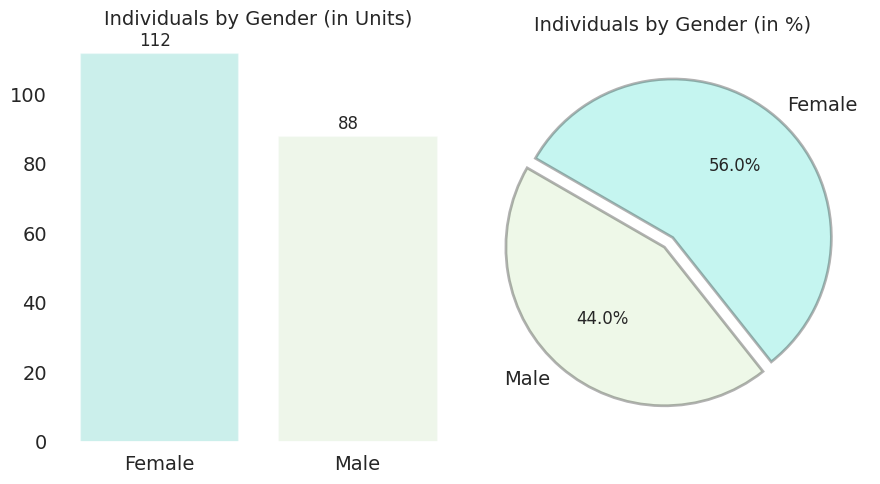

In [5]:

sns.set(rc={'axes.facecolor':'none','axes.grid':False,'xtick.labelsize':14,'ytick.labelsize':14, 'figure.autolayout':True})
plt.subplots(figsize=(9,5))
my_pal = ('#40E0D0', '#c7e9b4')
my_xpl = [0.0, 0.08]

## Total Individuals by Gender (in Units)
plt.subplot(1,2,1)
plt.title('Individuals by Gender (in Units)', fontsize=14)
ax = sns.countplot(x="Gender", data=df, palette=my_pal, order=df['Gender'].value_counts().index, alpha=0.3)
for p in ax.patches:
   ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.30, p.get_height()+2))
plt.xlabel(None)
plt.ylabel(None)

## Total Individuals by Gender (in %)
plt.subplot(1,2,2)
plt.title('Individuals by Gender (in %)',fontsize=14)
df['Gender'].value_counts().plot(kind='pie', colors=my_pal, legend=None, explode=my_xpl, ylabel='', counterclock=False, startangle=150, wedgeprops={'alpha':0.3, 'edgecolor' : 'black','linewidth': 2, 'antialiased': True}, autopct='%1.1f%%')

plt.show()

## patterns and trends in the numerical variables

/tmp/ipykernel_210030/3697146222.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3, 3, 1)


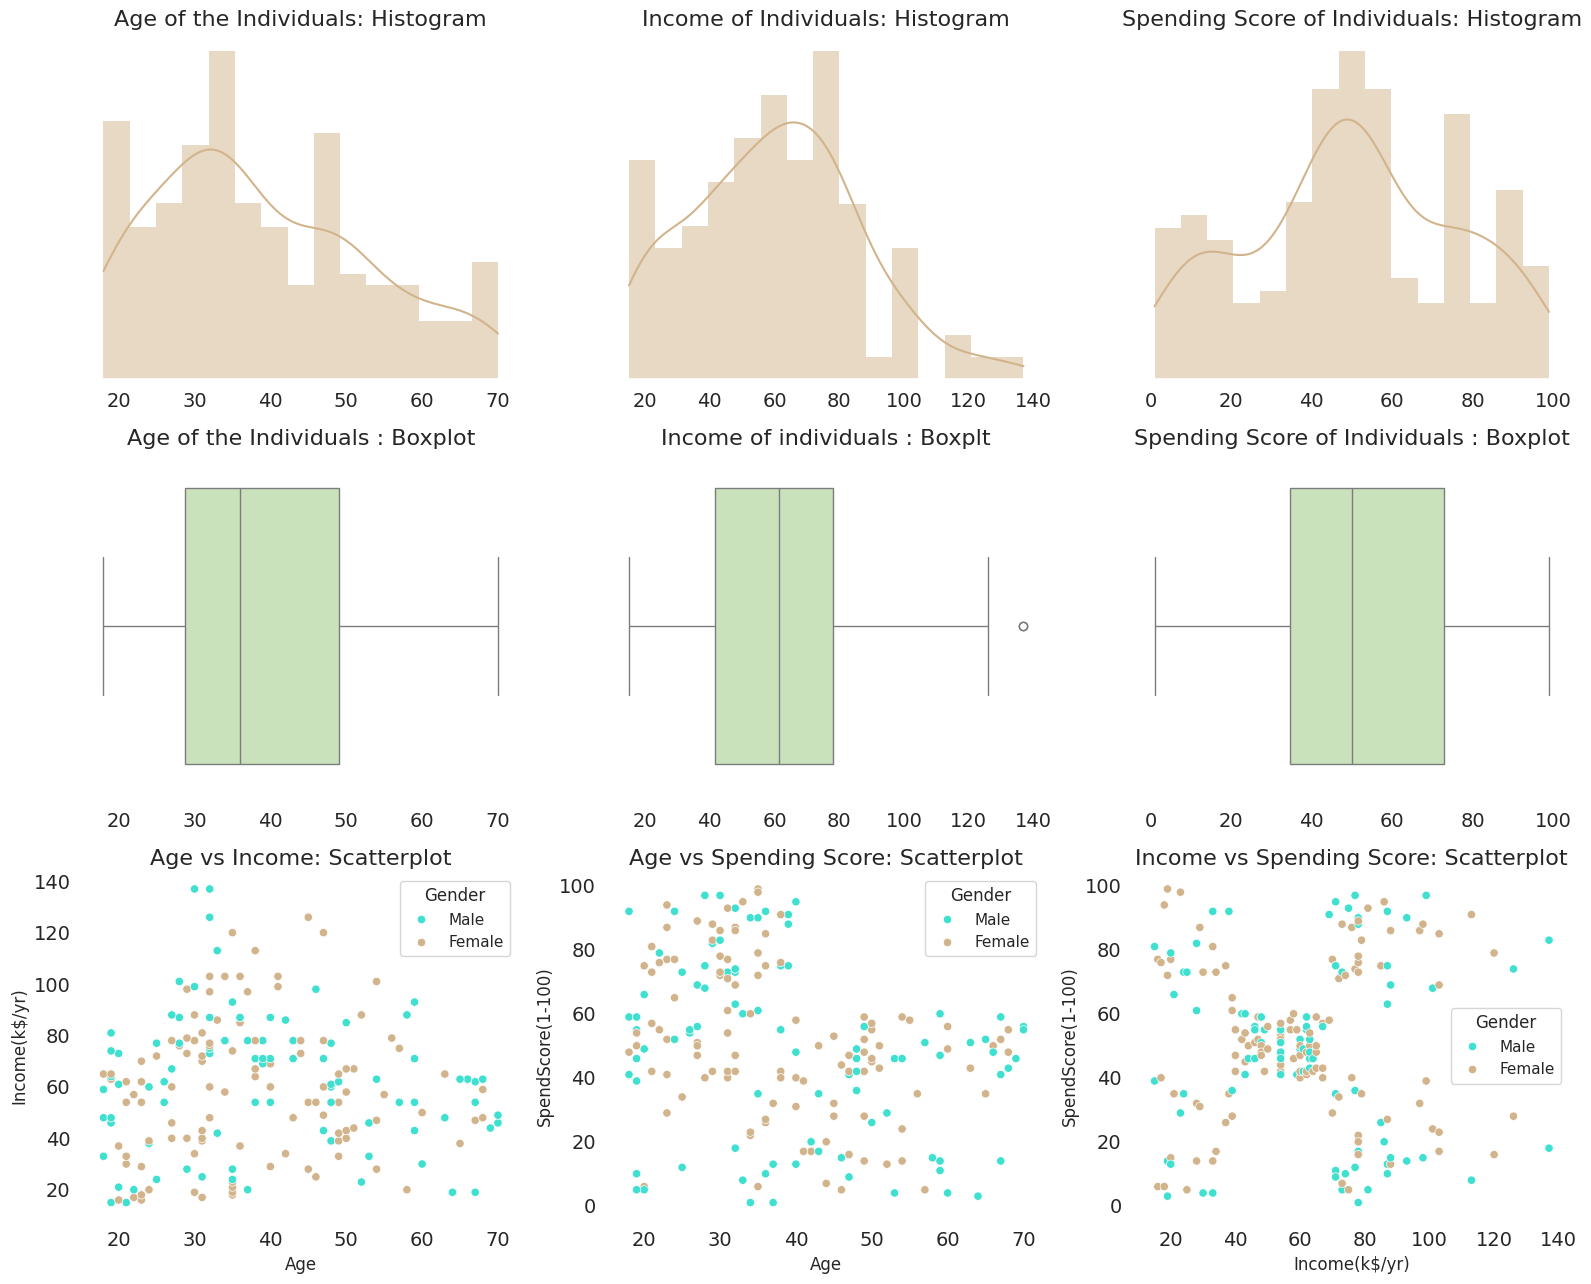

In [6]:
plt.subplots(figsize=(16,13))

# Plot 1: Age Histogram
plt.subplot(3, 3, 1)
plt.title('Age of the Individuals: Histogram', fontsize=16)
sns.histplot(df['Age'], color='#D2B48C', bins=15, kde=True, stat="density", linewidth=0)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

# Plot 2: Income Histogram
plt.subplot(3, 3, 2)
plt.title('Income of Individuals: Histogram', fontsize=16)
sns.histplot(df['Income(k$/yr)'], color='#D2B48C', bins=15, kde=True, stat="density", linewidth=0)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

# Plot 3: Spending Score Histogram
plt.subplot(3, 3, 3)
plt.title('Spending Score of Individuals: Histogram', fontsize=16)
sns.histplot(df['SpendScore(1-100)'], color='#D2B48C', bins=15, kde=True, stat="density", linewidth=0)
plt.ylabel(None)
plt.yticks([])
plt.xlabel(None)

plt.subplot(3,3,4)
plt.title('Age of the Individuals : Boxplot', fontsize=16)
sns.boxplot(df['Age'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,5)
plt.title('Income of individuals : Boxplt', fontsize=16)
sns.boxplot(df['Income(k$/yr)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,6)
plt.title('Spending Score of Individuals : Boxplot', fontsize=16)
sns.boxplot(df['SpendScore(1-100)'], color='#c7e9b4', orient="h")
plt.xlabel(None)
plt.ylabel(None)

plt.subplot(3,3,7)
plt.title('Age vs Income: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='Income(k$/yr)', hue='Gender', palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,8)
plt.title('Age vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Age', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.subplot(3,3,9)
plt.title('Income vs Spending Score: Scatterplot', fontsize=16)
sns.scatterplot(data=df, x='Income(k$/yr)', y='SpendScore(1-100)', hue='Gender',  palette=('#40E0D0', '#D2B48C'), alpha=1)

plt.show()

## Let's get features

In [7]:
X = df[['Income(k$/yr)', 'SpendScore(1-100)']].copy()
print(X.head(5))

   Income(k$/yr)  SpendScore(1-100)
0             15                 39
1             15                 81
2             16                  6
3             16                 77
4             17                 40


## Let's start by normalizing the data and 
## building a dataframe for analysis

In [8]:
norm = MinMaxScaler()

X_AP = norm.fit_transform(X)
X_AP = pd.DataFrame(X_AP, columns=X.columns)
print(X_AP.head(5))

   Income(k$/yr)  SpendScore(1-100)
0       0.000000           0.387755
1       0.000000           0.816327
2       0.008197           0.051020
3       0.008197           0.775510
4       0.016393           0.397959


# Apply Affinity Propagation Clustering

The damping factor in Affinity Propagation (AP) is a crucial parameter that influences the convergence behavior of the algorithm.
### Affinity Propagation Recap:
AP is a clustering algorithm that identifies exemplars (representative data points) and assigns other data points to these exemplars.
It uses message-passing between data points to determine exemplars and clusters.
#### Damping Factor:
- The damping factor (often denoted as damping) controls the extent to which messages are updated during each iteration.
- It lies between 0 and 1.
- A higher damping factor (closer to 1) leads to slower convergence but more stable results.
- A lower damping factor (closer to 0) accelerates convergence but may result in oscillations or instability.
#### How Damping Works:
- During message-passing, data points exchange information (responsibility and availability) with each other.
- The damping factor modifies the update rule for messages:
- A higher damping factor dampens the influence of new information, making the updates more conservative.
- A lower damping factor allows new information to have a stronger impact, potentially leading to faster convergence.
#### Choosing the Damping Factor:
- There is no one-size-fits-all value for the damping factor.
- It depends on the specific dataset and problem.
- Commonly used values are around 0.5.
- Experiment with different values to find the best trade-off between stability and convergence speed.
#### Effect on Convergence:
- A higher damping factor increases the number of iterations needed for convergence.
- A lower damping factor accelerates convergence but may lead to overshooting or instability.

In [9]:
# Apply Affinity Propagation Clustering
from sklearn.cluster import AffinityPropagation

affinity_propagation = AffinityPropagation(damping=0.8, max_iter=400)
cluster_labels = affinity_propagation.fit_predict(X_AP)

## Visualise the new dataframe with cluster numbers through scatterplot


   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        2
1    Male   21             15                 81        1
2  Female   20             16                  6        0
3  Female   23             16                 77        1
4  Female   31             17                 40        2


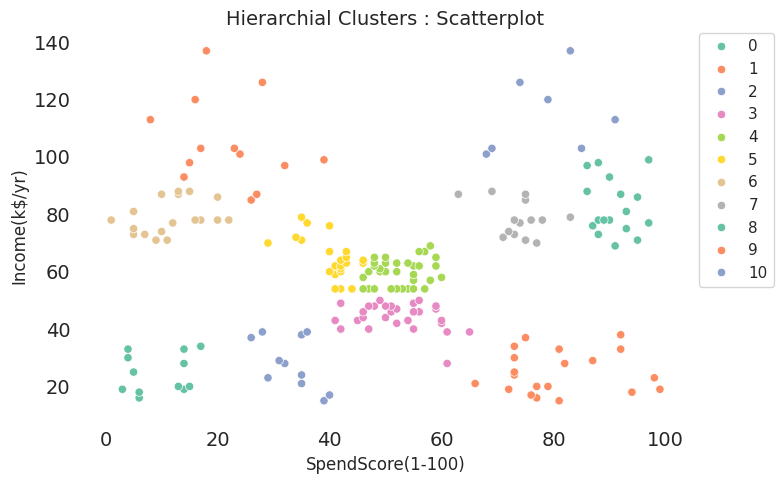

In [10]:
df_AP = df.copy()   ## making a copy of original dataframe
df_AP['Cluster'] = cluster_labels  ## appending the cluster column
print(df_AP.head(5))
plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_AP, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()


In [11]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Assuming you have cluster labels in 'cluster_labels' and data in 'X'
silhouette = silhouette_score(X_AP, cluster_labels)
davies_bouldin = davies_bouldin_score(X_AP, cluster_labels)

print(f"Silhouette Score: {silhouette:.4f}")
print(f"Davies-Bouldin Index: {davies_bouldin:.4f}")


Silhouette Score: 0.4356
Davies-Bouldin Index: 0.7600


## Clusters seem to be okay as DB Index is low and Sihoutte Score suggests that cluster is not too bad

# 3. Hierarchical Clustering

## Load the dataset

In [21]:
df = pd.read_csv('https://raw.githubusercontent.com/rahulbhadani/CPE490_590_Sp2025/refs/heads/master/Data/Mall_Customer/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Let's start the Hierarchial analysis by normalizing the data and 
## building a dataframe for analysis

In [23]:
norm = MinMaxScaler()

X_Hierar = norm.fit_transform(X)
X_Hierar = pd.DataFrame(X_Hierar, columns=X.columns)
print(X_Hierar.head(5))

   Income(k$/yr)  SpendScore(1-100)
0       0.000000           0.387755
1       0.000000           0.816327
2       0.008197           0.051020
3       0.008197           0.775510
4       0.016393           0.397959


## Build dendrogram to find out the optimal number of clusters


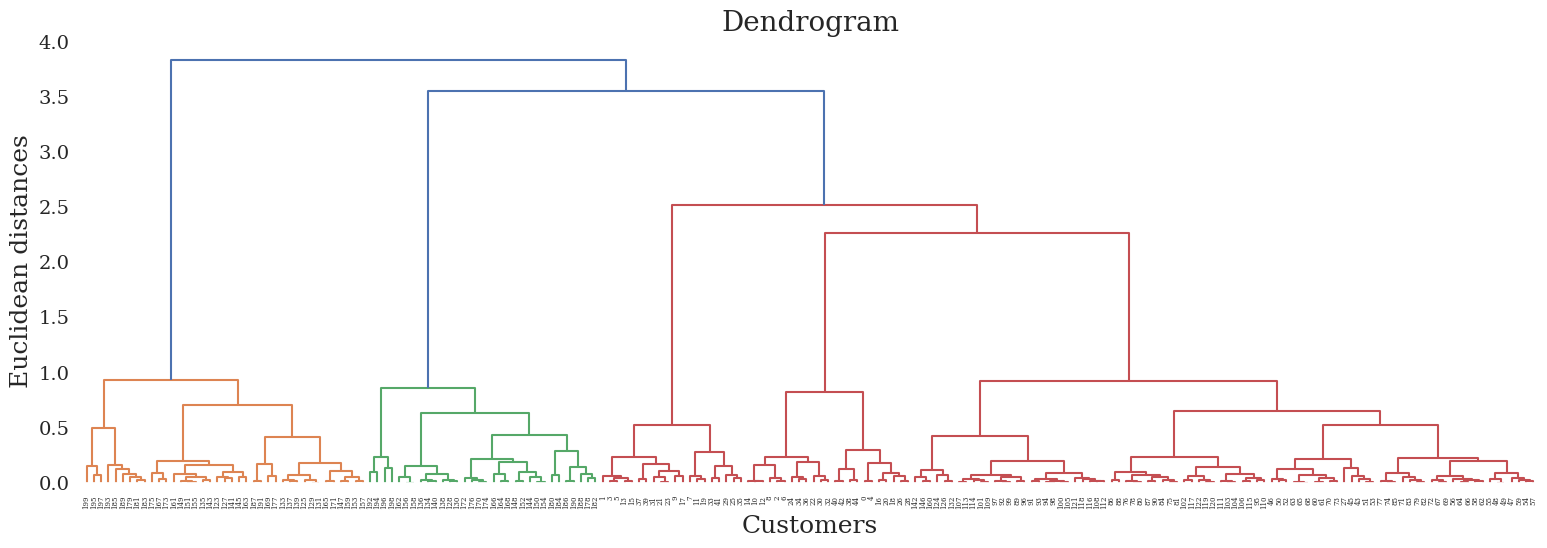

In [24]:

plt.figure(figsize=(16,6))
dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

## Draw the threshold level to identify the ideal number of clusters


## We will use Ward Method for Hierarchical Clustering Dendogram
### Linkage Matrix:
- The linkage matrix contains information about the process of building a tree (dendrogram) during hierarchical clustering.
- It encodes how data points (or clusters) are grouped together at each step of the clustering process.
- The matrix has dimensions (n-1) x 4, where n is the number of data points.
- Each row corresponds to a merge operation, combining two clusters into a larger cluster.
- The columns in each row represent:
- *Cluster 1 Index*: The index of the first cluster being merged.
- *Cluster 2 Index*: The index of the second cluster being merged.
- *Distance*: The distance between Cluster 1 and Cluster 2 (based on a chosen linkage method).
- *Number of Original Observations*: The total number of data points in the newly formed cluster.
### The linkage matrix is used to construct the dendrogram, which visually represents the clustering hierarchy.
### Linkage Methods:
#### Different linkage methods determine how the distance between clusters is calculated during merging:
- *Single Linkage*: Minimum pairwise distance between any two points in the clusters.
- *Complete Linkage*: Maximum pairwise distance between any two points in the clusters.
- *Average Linkage*: Average pairwise distance between points in the clusters.
- *Ward’s Method*: Minimizes the variance of distances when merging clusters.
- *Centroid Method*: Distance based on centroids of clusters.
### The choice of linkage method affects the resulting dendrogram and cluster structure.
### Interpretation:
- The linkage matrix helps us understand the order in which clusters were merged.
- By analyzing the distances and the number of original observations, we can identify significant clusters.
- The dendrogram visually represents this hierarchy, showing how data points are grouped together.

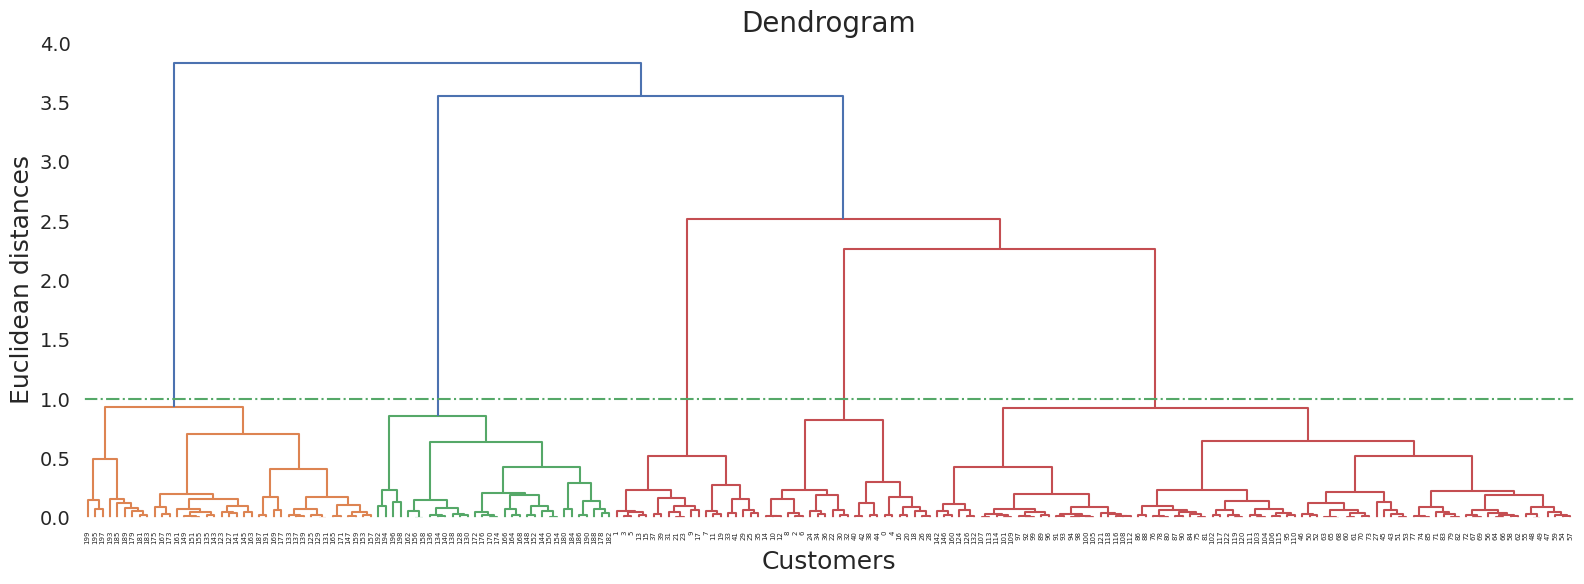

In [ ]:
plt.figure(figsize=(16,6))

#  computes the linkage matrix based on the input data X_Hierar using the Ward method.
# The Ward method minimizes the variance of distances between clusters when merging them.
# The resulting linkage matrix contains information about how the data points are grouped together.

dendrogram = shc.dendrogram(shc.linkage(X_Hierar, method = 'ward'))
plt.axhline(y = 1, color = 'g', linestyle = 'dashdot')

plt.title('Dendrogram', fontsize=20)
plt.xlabel('Customers', fontsize=18)
plt.ylabel('Euclidean distances', fontsize=18)
plt.show()

### The threshold line intersects 5 vertical lines, hence we can conclude that the number of clusters we can have as 5.

## Model fitting with 5 clusters


In [ ]:

clusters = AgglomerativeClustering(n_clusters=5,  linkage='ward')
y_kmeans = clusters.fit_predict(X_Hierar)
y_kmeans

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 0,
       1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0])

## Create a New Dataframe with an additional cluster column


In [ ]:
df_Hierar = df.copy()   ## making a copy of original dataframe
df_Hierar['Cluster'] = y_kmeans  ## appending the cluster column
print(df_Hierar.head(5))

   Gender  Age  Income(k$/yr)  SpendScore(1-100)  Cluster
0    Male   19             15                 39        4
1    Male   21             15                 81        3
2  Female   20             16                  6        4
3  Female   23             16                 77        3
4  Female   31             17                 40        4


## Visualise the new dataframe with cluster numbers through scatterplot


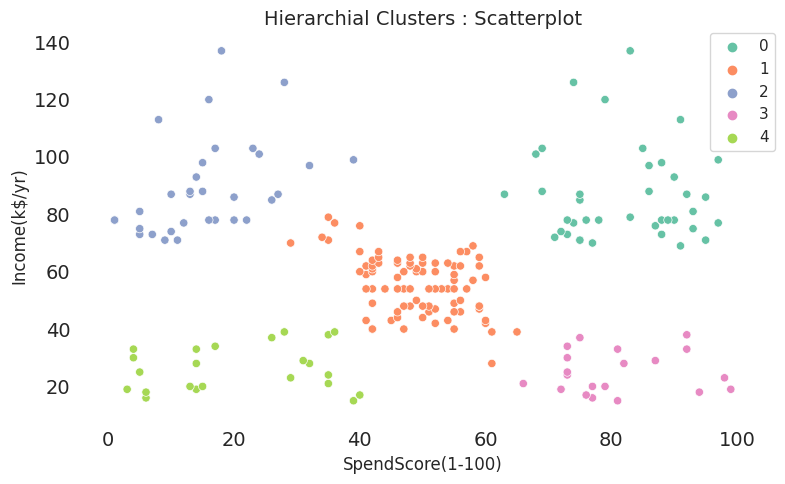

In [ ]:
plt.figure(figsize=(8,5))
plt.title('Hierarchial Clusters : Scatterplot', fontsize=14)
sns.scatterplot(data=df_Hierar, x='SpendScore(1-100)', y='Income(k$/yr)', hue='Cluster', palette="Set2")
plt.legend(bbox_to_anchor=(1.02, 1), loc='best', borderaxespad=0)
plt.show()

# 4. DBSCAN

In [25]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Load the data
data_df = pd.read_csv('https://raw.githubusercontent.com/rahulbhadani/CPE490_590_Sp2025/refs/heads/master/Data/Iris/iris.data', index_col=0)
true_label = data_df[['Class']]
# Drop rows with missing values
data_df.dropna(axis=0, how='any', inplace=True)
data_df.drop(columns='Class', inplace=True)
data_df

,SepalWidth,PetalLength,PetalWidth
SepalLength,,,
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
...,...,...,...
6.7,3.0,5.2,2.3
6.3,2.5,5.0,1.9
6.5,3.0,5.2,2.0


## We will use PCA to reduce number of features. Note that this step is not necessary and here it is only for demonstration purposes
## We choose number of components that captures at least 95% of variance

In [26]:
# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(data_df)

from sklearn.decomposition import PCA


# Create a PCA object
pca = PCA()

# Fit the PCA model to your data
pca.fit(X)

# Calculate cumulative sum of the explained variance
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# Find the number of components for 99% variance
num_components = np.where(cumulative_variance >= 0.99)[0][0] + 1

print(f"Number of components for 99% variance: {num_components}")

# Transform the data to the first num_components principal components
X_reduced = pca.transform(X)[:, :num_components]

Number of components for 99% variance: 3


# Apply DBSCAN. You need to adjust parameters for DBSCAN

In [27]:


# Apply DBSCAN
eps = 0.45  # Adjust this value based on your data
min_samples = 3  # Adjust as needed
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
labels = dbscan.fit_predict(X_reduced)

# Print unique labels. -1 means some datapoints were classified as noise
np.unique(labels)



array([-1,  0,  1,  2])

In [28]:
count = np.count_nonzero(labels == -1)

print(f"The number of -1s (data points classified as noise) in the labels: {count}")

The number of -1s (data points classified as noise) in the labels: 10


# Calculate Silhoutte Score


In [29]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score
score = silhouette_score(X, labels)

print('Silhouette Score: %.3f' % score)

Silhouette Score: 0.239


# Other metrics for Cluster Quality

In [30]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score, adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score

true_label = true_label.values.ravel()

# Calculate Davies-Bouldin Index
db_index = davies_bouldin_score(X, labels)

# Calculate Calinski-Harabasz Index
ch_index = calinski_harabasz_score(X, labels)

# Calculate Adjusted Rand Index
ari = adjusted_rand_score(true_label, labels)

# Calculate Normalized Mutual Information
nmi = normalized_mutual_info_score(true_label, labels)

# Calculate Fowlkes-Mallows Index
fmi = fowlkes_mallows_score(true_label, labels)

print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Calinski-Harabasz Index: {ch_index:.3f}")
print(f"Adjusted Rand Index: {ari:.3f}")
print(f"Normalized Mutual Information: {nmi:.3f}")
print(f"Fowlkes-Mallows Index: {fmi:.3f}")


Davies-Bouldin Index: 5.710
Calinski-Harabasz Index: 85.894
Adjusted Rand Index: 0.520
Normalized Mutual Information: 0.599
Fowlkes-Mallows Index: 0.711


# Intepretation of Metrics

### Davies-Bouldin Index (DBI):
- Measures the average similarity between each cluster and its most similar cluster.
- Lower values indicate better clustering (closer to 0 is ideal).
- DBI value of 5.710 suggests that the clusters are not well-separated.
### Calinski-Harabasz Index (CHI):
- Evaluates the ratio of between-cluster variance to within-cluster variance.
- Higher values indicate better-defined clusters.
- CHI value of 85.894 indicates relatively good separation between clusters.
### Adjusted Rand Index (ARI):
- Measures the similarity between true labels and predicted clusters.
- Ranges from -1 (no agreement) to 1 (perfect agreement).
- ARI value of 0.520 suggests moderate agreement between true labels and clusters.
### Normalized Mutual Information (NMI):
- Measures the mutual information between true labels and predicted clusters, normalized by entropy.
- Ranges from 0 (no agreement) to 1 (perfect agreement).
- NMI value of 0.599 indicates moderate agreement.
### Fowlkes-Mallows Index (FMI):
- Compares the true pairwise similarities with the predicted pairwise similarities.
- Ranges from 0 (no agreement) to 1 (perfect agreement).
- FMI value of 0.711 suggests relatively good agreement.


# Visualize true and predicted labels.
# Note that true labels won't be available for most unsupervised learning. Iris Dataset has true labels that's why we could compare true and predicted labels

/tmp/ipykernel_210030/3680850473.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=true_label_color_list, cmap='viridis', label='True Labels')


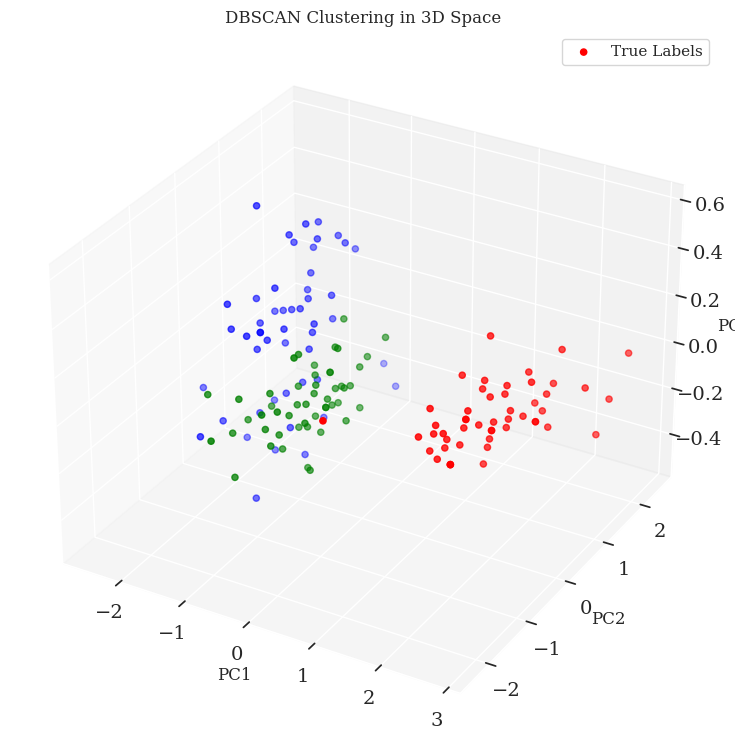

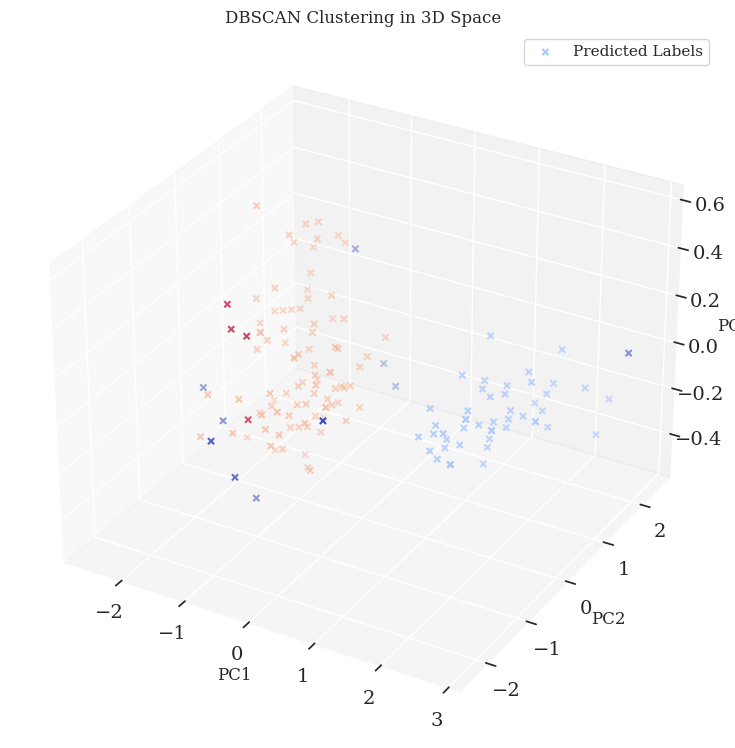

In [33]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot true labels
true_label_colors = {'Iris-setosa': 'red', 'Iris-versicolor': 'green', 'Iris-virginica': 'blue'}
true_label_color_list = [true_label_colors[label] for label in true_label]

ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=true_label_color_list, cmap='viridis', label='True Labels')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clustering in 3D Space')
ax.legend()

plt.show()

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot predicted labels
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=labels, cmap='coolwarm', marker='x', label='Predicted Labels')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('DBSCAN Clustering in 3D Space')
ax.legend()

plt.show()


# 5. Gaussian Mixture Model

## GMM as a better version of K-means

The k-means model can be conceptualized as placing a circle (or, in higher dimensions, a hyper-sphere) at the center of each cluster. The radius of this circle is determined by the most distant point within the cluster. This radius serves as a strict boundary for assigning data points to the cluster during training: any point outside this circle is not considered a part of the cluster. To visualize this cluster model, we can use the following function:

### Generate some data

In [34]:
# Generate some data
from sklearn.datasets import make_blobs
import seaborn as sns
sns.set_style("whitegrid")
import numpy as np                ## linear algebra
import pandas as pd               ## data processing, dataset file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt   ## data visualization & graphical plotting
X, y_true = make_blobs(n_samples=400, centers=5,
                       cluster_std=0.70, random_state=0)
X = X[:, ::-1] # flip axes for better plotting

In [35]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, edgecolors='black')

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

/home/refulgent/anaconda3/envs/CPE490590/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


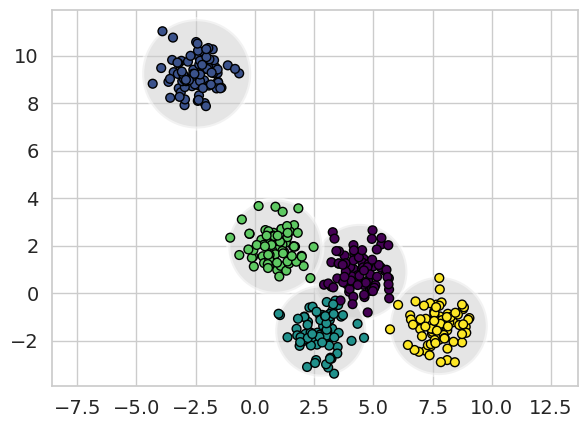

In [36]:
kmeans = KMeans(n_clusters=5, random_state=0)
plot_kmeans(kmeans, X)

## An important observation for k-means is that these cluster models must be circular: 
### k-means has no built-in way of accounting for oblong or elliptical clusters. So, for example, if we take the same data and transform it, the cluster assignments end up becoming muddled:

/home/refulgent/anaconda3/envs/CPE490590/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


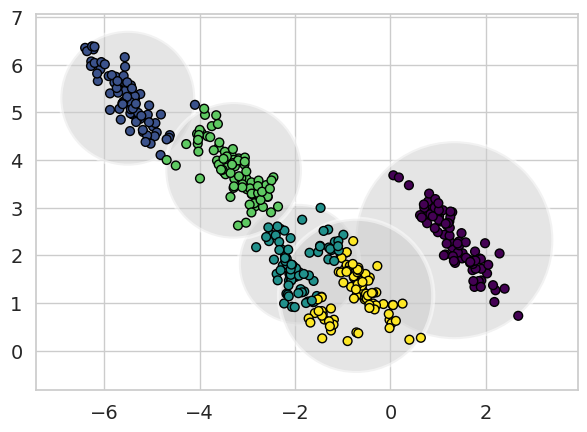

In [37]:
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=5, random_state=0)
plot_kmeans(kmeans, X_stretched)

### By eye, we recognize that these transformed clusters are non-circular, and thus circular clusters would be a poor fit.

# Gaussian Mixture Models
A Gaussian mixture model (GMM) attempts to find a mixture of multi-dimensional Gaussian probability distributions that best model any input dataset. In the simplest case, GMMs can be used for finding clusters in the same manner as k-means:

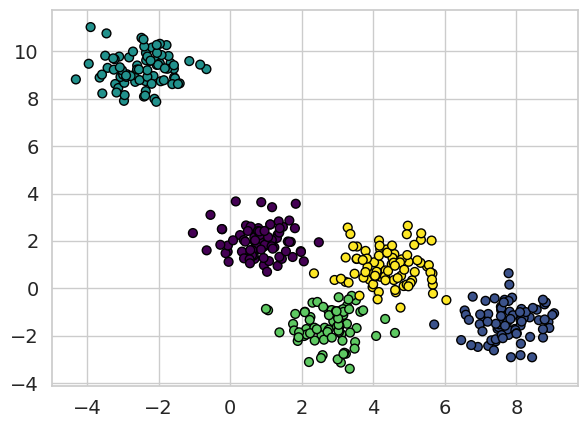

In [38]:
from sklearn.mixture import GaussianMixture as GMM

gmm = GMM(n_components=5).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', edgecolors='black');

### But because GMM contains a probabilistic model under the hood, it is also possible to find probabilistic cluster assignments


In [39]:
probs = gmm.predict_proba(X)
print(probs[:5].round(3))

[[0.    1.    0.    0.    0.   ]
 [0.    0.    0.    1.    0.   ]
 [1.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.999 0.001]
 [1.    0.    0.    0.    0.   ]]


### We can visualize this uncertainty by, for example, making the size of each point proportional to the certainty of its prediction; looking at the following figure, we can see that it is precisely the points at the boundaries between clusters that reflect this uncertainty of cluster assignment:

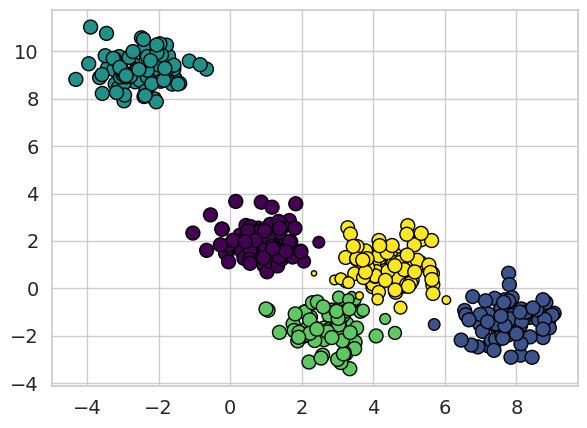

In [40]:
size = 100 * probs.max(1) ** 2  # square emphasizes differences
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=size, edgecolors='black');

## GMM uses Expectation-Maximization
### Choose starting guesses for the location and shape
### Repeat until converged:
- E-step: for each point, find weights encoding the probability of membership in each cluster
- M-step: for each cluster, update its location, normalization, and shape based on all data points, making use of the weights

### The result of this is that each cluster is associated not with a hard-edged sphere, but with a smooth Gaussian model. Just as in the k-means approach, this algorithm can sometimes miss the globally optimal solution, and thus in practice multiple random initializations are used.

### Let's create a function that will help us visualize the locations and shapes of the GMM clusters by drawing ellipses based on the GMM output:

In [41]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2, edgecolors='black')
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2, edgecolors='black')
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

/tmp/ipykernel_210030/3782685461.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


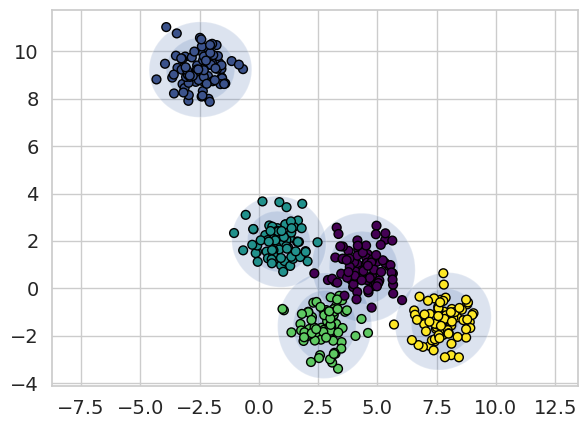

In [42]:
gmm = GMM(n_components=5, random_state=42)
plot_gmm(gmm, X)

### Similarly, we can use the GMM approach to fit our stretched dataset; allowing for a full covariance the model will fit even very oblong, stretched-out clusters:

/tmp/ipykernel_210030/3782685461.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


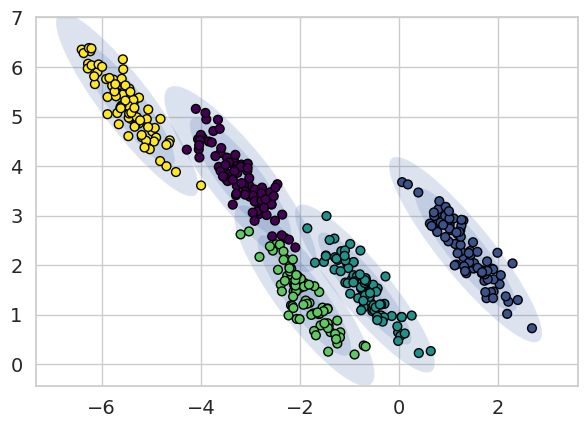

In [43]:
gmm = GMM(n_components=5, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

### This demonstrates the GMM is better than K-means

# GMM as Density Estimation

### Though GMM is often categorized as a clustering algorithm, fundamentally it is an algorithm for density estimation. That is to say, the result of a GMM fit to some data is technically not a clustering model, but a generative probabilistic model describing the distribution of the data.



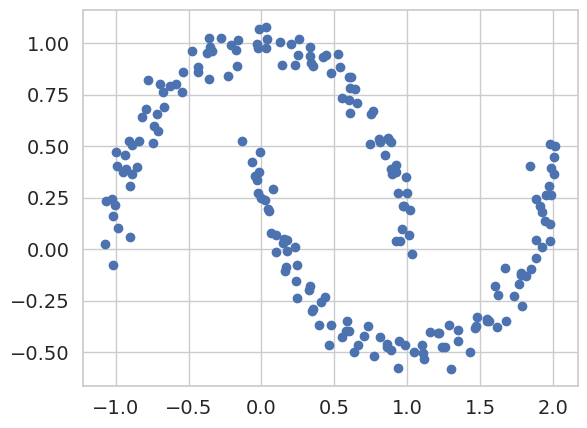

In [44]:
from sklearn.datasets import make_moons
Xmoon, ymoon = make_moons(200, noise=.05, random_state=0)
plt.scatter(Xmoon[:, 0], Xmoon[:, 1]);

### If we try to fit this with a two-component GMM viewed as a clustering model, the results are not particularly useful:

/tmp/ipykernel_210030/3782685461.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


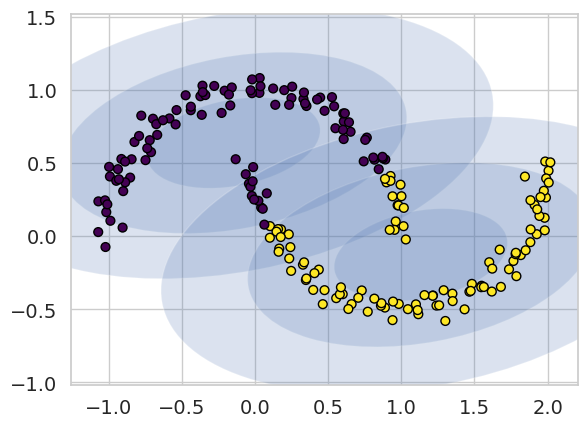

In [45]:
gmm2 = GMM(n_components=2, covariance_type='full', random_state=0)
plot_gmm(gmm2, Xmoon)

## But if we instead use many more components and ignore the cluster labels, we find a fit that is much closer to the input data:

/tmp/ipykernel_210030/3782685461.py:18: MatplotlibDeprecationWarning: Passing the angle parameter of __init__() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  ax.add_patch(Ellipse(position, nsig * width, nsig * height,


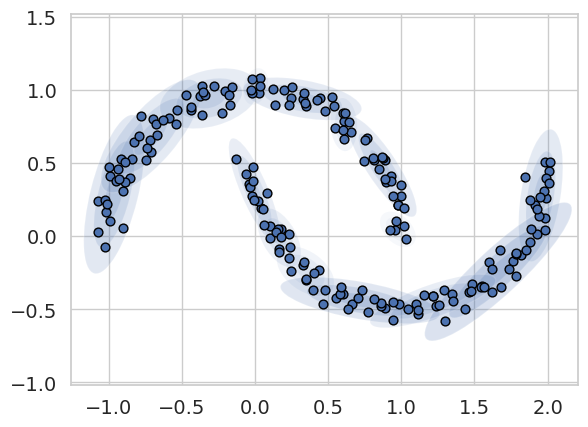

In [46]:
gmm16 = GMM(n_components=16, covariance_type='full', random_state=0)
plot_gmm(gmm16, Xmoon, label=False)

### Here the mixture of 16 Gaussians serves not to find separated clusters of data, but rather to model the overall distribution of the input data. This is a generative model of the distribution, meaning that the GMM gives us the recipe to generate new random data distributed similarly to our input. For example, here are 400 new points drawn from this 16-component GMM fit to our original data:

/tmp/ipykernel_210030/1772006041.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(Xnew[:, 0], Xnew[:, 1], s=40, cmap='viridis', zorder=2, edgecolors='black')


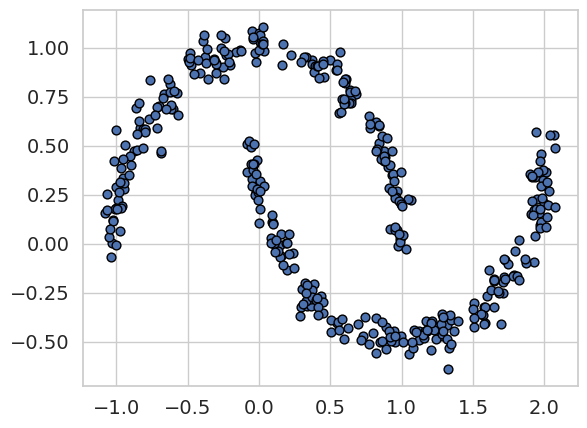

In [47]:
Xnew, _ = gmm16.sample(400)  # Extract the samples (ignore the cluster labels)
plt.scatter(Xnew[:, 0], Xnew[:, 1], s=40, cmap='viridis', zorder=2, edgecolors='black')